In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, Activation, MaxPooling1D, LSTM
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
uploaded = files.upload()

Saving mfccFeatures_emotion_3.csv to mfccFeatures_emotion_3.csv


In [0]:
filename = "mfccFeatures_emotion_3.csv"

In [0]:
data = pd.read_csv(filename)
train, test = train_test_split(data, test_size=0.1)
train_data = np.array(train.iloc[:,0:50].copy())
train_label = np.array(train.iloc[:,50:].copy())
test_data = np.array(test.iloc[:,0:50].copy())
test_label = np.array(test.iloc[:,50:].copy())
print(data.shape)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(1440, 51)
(1296, 50)
(1296, 1)
(144, 50)
(144, 1)


In [0]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                 input_shape=(50,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

In [0]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(50, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [0]:
model = create_model_LSTM()

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
__________

In [0]:
def toCategorical(data,numberOfCategories):
    d = np.array(data)
    c = []
    for i in d:
        c.append(np.zeros(8))
        c[-1][i[0]-1] = 1
    return np.array(c)

In [0]:
f = model.fit(train_data.reshape(len(train_data),50,1),toCategorical(train_label,8),epochs=100,batch_size=50, validation_split=0.2,shuffle=True)

Train on 1036 samples, validate on 260 samples
Epoch 1/100
1036/1036 [==============================] - 3s 3ms/step - loss: 2.0734 - acc: 0.1477 - val_loss: 2.0647 - val_acc: 0.1654
Epoch 2/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.0631 - acc: 0.1612 - val_loss: 2.0490 - val_acc: 0.1731
Epoch 3/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.0485 - acc: 0.1718 - val_loss: 2.0374 - val_acc: 0.1808
Epoch 4/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.0344 - acc: 0.1998 - val_loss: 2.0177 - val_acc: 0.2038
Epoch 5/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.0211 - acc: 0.1959 - val_loss: 1.9827 - val_acc: 0.2038
Epoch 6/100
1036/1036 [==============================] - 2s 2ms/step - loss: 1.9911 - acc: 0.2201 - val_loss: 1.9742 - val_acc: 0.2346
Epoch 7/100
1036/1036 [==============================] - 2s 2ms/step - loss: 1.9600 - acc: 0.2288 - val_loss: 1.9289 - val_acc: 0.2808
Epoch 8/

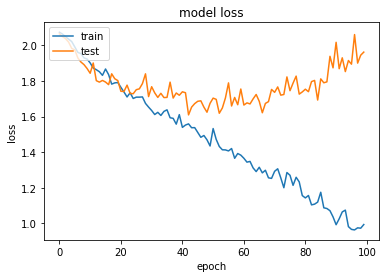

In [0]:
import matplotlib.pyplot as plt
plt.plot(f.history['loss'])
plt.plot(f.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

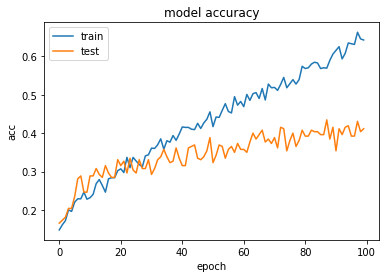

In [0]:
plt.plot(f.history['acc'])
plt.plot(f.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_data.reshape(len(test_data),50,1), toCategorical(test_label,8))
print("Test Accuracy: ", test_acc)

144/144 [==============================] - 0s 537us/step
Test Accuracy:  0.4444444444444444


In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
import os
os.listdir('/content')

['.config', 'model.png', 'mfccFeatures_emotion_3.csv', 'sample_data']

In [0]:
from google.colab import files
files.download( "/content/model.png" ) 